In [1]:
# Загружаем необходимые библиотеки

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import decomposition
from sklearn import cluster
%matplotlib inline

In [2]:
# загружаем pickle файл

with open('./descriptors/osnet.pickle', 'rb') as pkl_file:
    os_data = pickle.load(pkl_file)
os_data

array([[0.        , 0.        , 0.        , ..., 0.73321515, 0.        ,
        5.9709315 ],
       [0.        , 0.        , 0.        , ..., 2.2757177 , 0.        ,
        0.9488349 ],
       [0.        , 0.        , 0.        , ..., 1.7822491 , 0.        ,
        3.8112872 ],
       ...,
       [0.        , 0.        , 0.        , ..., 3.7419376 , 0.        ,
        3.0801718 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        4.114627  ],
       [0.        , 0.        , 0.        , ..., 2.0509033 , 0.        ,
        4.501842  ]], dtype=float32)

In [3]:
os_data[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.3329916e-40,
       1.2994150e+00, 4.4821372e+00, 0.0000000e+00, 0.0000000e+00,
       2.5215778e+00, 0.0000000e+00, 3.6325550e-01, 3.7433854e-01,
       4.0569839e-01, 8.2142776e-01, 0.0000000e+00, 7.0845854e-01,
       1.2002379e+00, 4.4275675e+00, 0.0000000e+00, 2.6442964e+00,
       9.6773791e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.3393279e+00, 2.8524499e+00, 3.0044925e-01, 5.0919980e-01,
       0.0000000e+00, 9.4407320e-01, 2.5941904e+00, 1.1430223e+00,
       6.3011110e-01, 2.0902557e+00, 7.0868224e-01, 0.0000000e+00,
       1.6893280e+00, 0.0000000e+00, 0.0000000e+00, 9.3843973e-01,
       0.0000000e+00, 6.7027712e-01, 1.7752293e+00, 1.0951049e+00,
       0.0000000e+00, 2.9615097e+00, 0.0000000e+00, 1.0061954e+01,
       1.9215629e+00, 0.0000000e+00, 2.5689524e-01, 2.3880181e+00,
       2.5294333e+00, 1.6770215e+00, 0.0000000e+00, 0.0000000e+00,
       1.3579648e+00, 5.2024919e-01, 1.4742182e+00, 0.0000000e

In [15]:
os_data.shape

(416314, 512)

c PCA на KMeans

In [4]:
# Уменьшаем размерность данных с помощью PCA

pca = decomposition.PCA(n_components=2)
pca.fit(os_data)
pca_data = pca.transform(os_data)

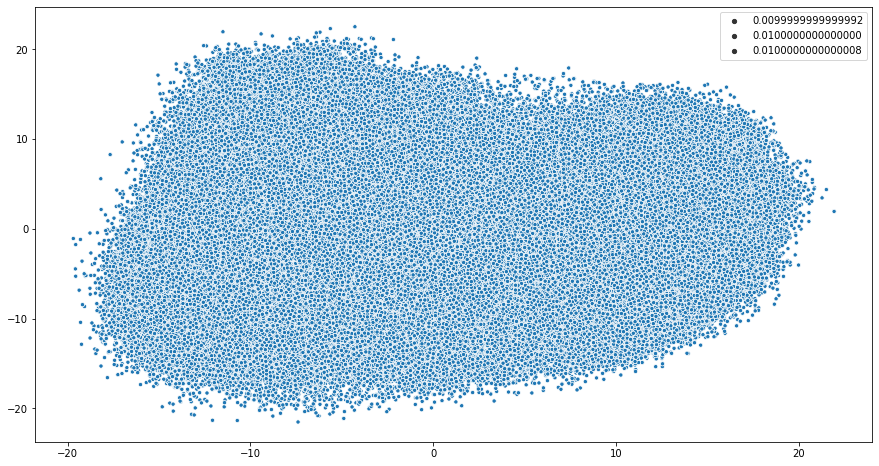

In [5]:
# визиализируем полученные данные с PCA

plt.figure(figsize=(15,8))
sns.scatterplot(pca_data[:,0],pca_data[:,1],size=0.01);

In [6]:
# Ищем оптимальное число кластеров с локтевым методом
d = []

for i in range(1, 20):
    k = cluster.KMeans(n_clusters=i, init='k-means++', random_state=42).fit(pca_data)
    d.append(k.inertia_)

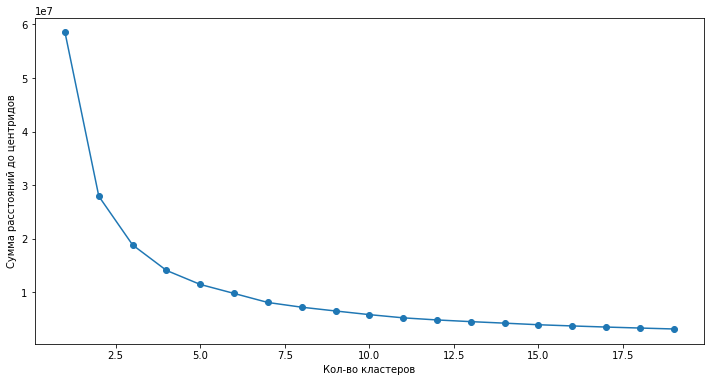

In [7]:
# рисуем график для понимание какое число кластеров

plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), d, marker='o')
plt.xlabel('Кол-во кластеров')
plt.ylabel('Сумма расстояний до центридов');

In [8]:
# Видим, что оптимальное количество кластеров 9 обучаем модель на KMeans

model = cluster.KMeans(n_clusters=9, init='k-means++', random_state=42)
y_model = model.fit_predict(pca_data)

In [9]:
# Смотрим метрики

print (sklearn.metrics.calinski_harabasz_score(pca_data, y_model))
print(sklearn.metrics.davies_bouldin_score(pca_data, y_model))

416015.41001326044
0.8180692650045145


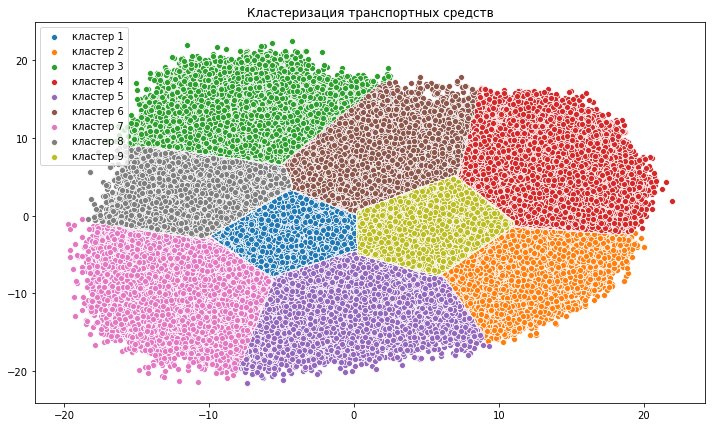

In [10]:
# Визуализируем модель

plt.figure(figsize=(12, 7))
sns.scatterplot(pca_data[y_model == 0, 0], pca_data[y_model == 0, 1], label='кластер 1')
sns.scatterplot(pca_data[y_model == 1, 0], pca_data[y_model == 1, 1], label='кластер 2')
sns.scatterplot(pca_data[y_model == 2, 0], pca_data[y_model == 2, 1], label='кластер 3')
sns.scatterplot(pca_data[y_model == 3, 0], pca_data[y_model == 3, 1], label='кластер 4')
sns.scatterplot(pca_data[y_model == 4, 0], pca_data[y_model == 4, 1], label='кластер 5')
sns.scatterplot(pca_data[y_model == 5, 0], pca_data[y_model == 5, 1], label='кластер 6')
sns.scatterplot(pca_data[y_model == 6, 0], pca_data[y_model == 6, 1], label='кластер 7')
sns.scatterplot(pca_data[y_model == 7, 0], pca_data[y_model == 7, 1], label='кластер 8')
sns.scatterplot(pca_data[y_model == 8, 0], pca_data[y_model == 8, 1], label='кластер 9')
plt.title('Кластеризация транспортных средств')
plt.legend();

In [11]:
# Поиск выбросов

from sklearn.ensemble import IsolationForest
import numpy as np
clf = IsolationForest( behaviour = 'new', max_samples=100000, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(pca_data)# -1 это выброс, 1 это нет
array_d = {}.fromkeys(preds, 0)
for a in preds:
    array_d[a] += 1
print(array_d)# сколько не выбросов и выбросов

C:\Users\daur_\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:255: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


{1: 366169, -1: 50145}


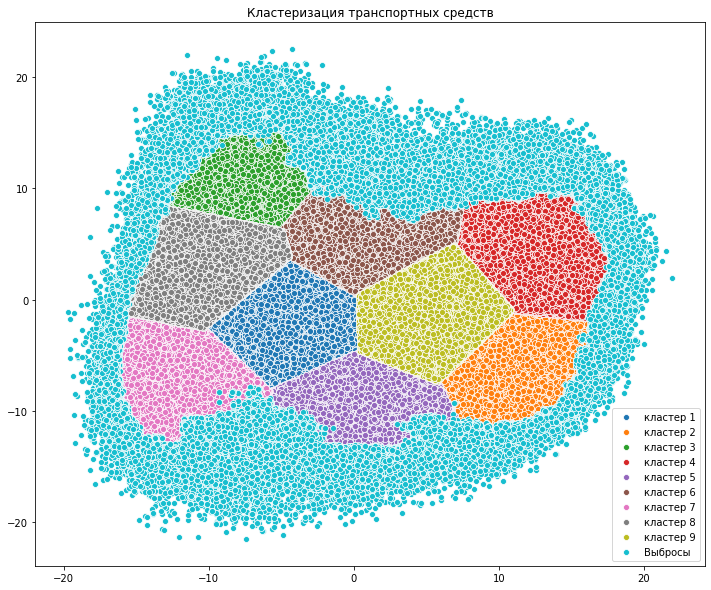

In [12]:
# визуализируем с выбросами

plt.figure(figsize=(12, 10))
sns.scatterplot(pca_data[(y_model == 0)&(preds == 1), 0], pca_data[(y_model == 0)&(preds == 1), 1], label='кластер 1')
sns.scatterplot(pca_data[(y_model == 1)&(preds == 1), 0], pca_data[(y_model == 1)&(preds == 1), 1], label='кластер 2')
sns.scatterplot(pca_data[(y_model == 2)&(preds == 1), 0], pca_data[(y_model == 2)&(preds == 1), 1], label='кластер 3')
sns.scatterplot(pca_data[(y_model == 3)&(preds == 1), 0], pca_data[(y_model == 3)&(preds == 1), 1], label='кластер 4')
sns.scatterplot(pca_data[(y_model == 4)&(preds == 1), 0], pca_data[(y_model == 4)&(preds == 1), 1], label='кластер 5')
sns.scatterplot(pca_data[(y_model == 5)&(preds == 1), 0], pca_data[(y_model == 5)&(preds == 1), 1], label='кластер 6')
sns.scatterplot(pca_data[(y_model == 6)&(preds == 1), 0], pca_data[(y_model == 6)&(preds == 1), 1], label='кластер 7')
sns.scatterplot(pca_data[(y_model == 7)&(preds == 1), 0], pca_data[(y_model == 7)&(preds == 1), 1], label='кластер 8')
sns.scatterplot(pca_data[(y_model == 8)&(preds == 1), 0], pca_data[(y_model == 8)&(preds == 1), 1], label='кластер 9')
sns.scatterplot(pca_data[preds == -1, 0], pca_data[preds == -1, 1], label='Выбросы')

plt.title('Кластеризация транспортных средств')
plt.legend();

In [13]:
# Берем структуру из заранее подготовленного файла и записываем туда наши предсказания и выбросы как отдельные столбцы

batch = pd.read_excel('id.xlsx')
batch['cluster'] = y_model # добавляем в нее результат кластеризации
batch['outlier'] = preds
batch.to_excel('predictions_cluster_osnet_pca_2dim.xlsx', index=False) # записываем результат на диск

In [14]:
# выводим первые 50 результатов, что бы сравнить с картинками

batch.head(50)

,batch_id,id,cluster,outlier
0,1,1,3,1
1,1,1,3,-1
2,1,1,1,-1
3,1,1,3,1
4,1,1,1,-1
5,1,1,3,1
6,1,2,8,1
7,1,2,8,1
8,1,2,0,1
9,1,2,0,1
